In [4]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [7]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [11]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [61]:
scaler = StandardScaler()
columns_to_scale = market_data_df.columns
scaled_data = scaler.fit_transform(market_data_df[columns_to_scale])


df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale, index=market_data_df.index)

df_scaled


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [77]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [78]:
# Create an empty list to store the inertia values
inertia_values = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k)

    model.fit(df_scaled)

    inertia_values.append(model.inertia_)
inertia_values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[287.0,
 198.57181809798126,
 123.19048183836958,
 79.02243535120977,
 63.85866780584264,
 52.10180599356482,
 43.48160605008147,
 36.61524240882041,
 32.38138887871696,
 28.730182338074954]

In [79]:
elbow_curve_dict = dict(zip(k_values, inertia_values))


In [80]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(list(elbow_curve_dict.items()), columns=['k', 'inertia'])

# Display the DataFrame
elbow_curve_df

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,52.101806
6,7,43.481606
7,8,36.615242
8,9,32.381389
9,10,28.730182


<Axes: xlabel='k'>

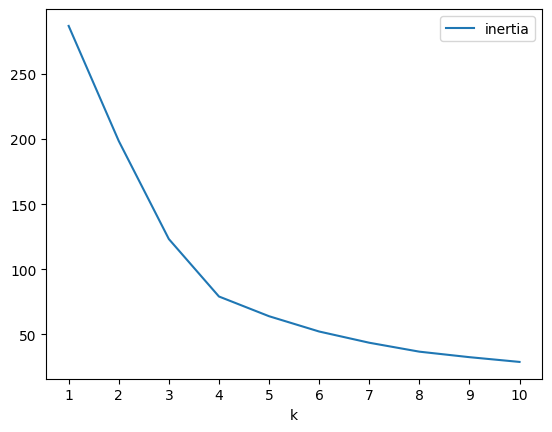

In [81]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve_df.plot.line(x='k',y='inertia',xticks=elbow_curve_df['k'])

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:** 4


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [82]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [83]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [84]:
# Predict the clusters to group the cryptocurrencies using the scaled data

predicted_data = model.predict(df_scaled)
# View the resulting array of cluster values.
predicted_data

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [85]:
# Create a copy of the DataFrame
market_data_df_prediction = market_data_df.copy()
market_data_df_prediction.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [86]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_prediction['crypto_cluster']=predicted_data

# Display sample data
market_data_df_prediction.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

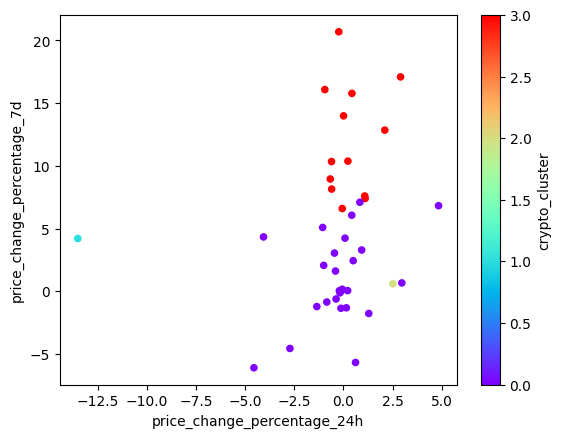

In [87]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_df_prediction.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='crypto_cluster',colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [63]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [64]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
df_info_pca = pca.fit_transform(df_scaled)
df_info_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [66]:
explained_variances = pca.explained_variance_ratio_

In [ ]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.


array([0.3719856 , 0.34700813, 0.17603793])

In [67]:
total_explained_variance = sum(explained_variances)
total_explained_variance


0.895031657030984

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895031657030984

In [68]:
# Create the PCA DataFrame
info_pca_df = pd.DataFrame(
    df_info_pca,
    columns=["PCA1", "PCA2","PCA3"]
)

# Review the PCA DataFrame
info_pca_df.head(10)

,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715
5,-0.516534,1.388377,0.804071
6,-0.450711,0.517699,2.846143
7,-0.345600,0.729439,1.478013
8,-0.649468,0.432165,0.600303
9,-0.759014,-0.201200,-0.217653


In [70]:
info_pca_df.index = df_scaled.index

In [72]:
info_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [74]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(info_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(10)

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217
5,6,27.961695
6,7,24.462735
7,8,19.451747
8,9,13.755814
9,10,13.119661


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

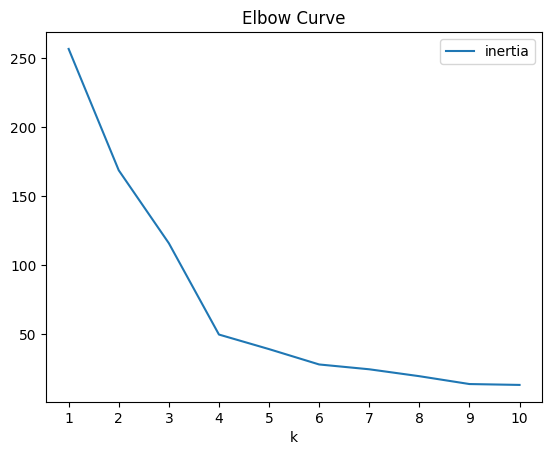

In [75]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No



In [88]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 34.28%
Percentage decrease from k=2 to k=3: 31.33%
Percentage decrease from k=3 to k=4: 57.15%
Percentage decrease from k=4 to k=5: 21.28%
Percentage decrease from k=5 to k=6: 28.48%
Percentage decrease from k=6 to k=7: 12.51%
Percentage decrease from k=7 to k=8: 20.48%
Percentage decrease from k=8 to k=9: 29.28%
Percentage decrease from k=9 to k=10: 4.62%


### Cluster Cryptocurrencies with K-means Using the PCA Data

In [89]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=0)


In [90]:
# Fit the K-Means model using the PCA data

model.fit(info_pca_df)



KMeans(n_clusters=4, n_init='auto', random_state=0)

In [91]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(info_pca_df)

# Print the resulting array of cluster values.
k_4

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3],
      dtype=int32)

In [96]:
# Create a copy of the DataFrame with the PCA data
pca_predictions_df = info_pca_df.copy()

# Add a class column with the labels
pca_predictions_df["crypto_cluster"] = k_4
pca_predictions_df.head()


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [ ]:
# Display sample data


,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

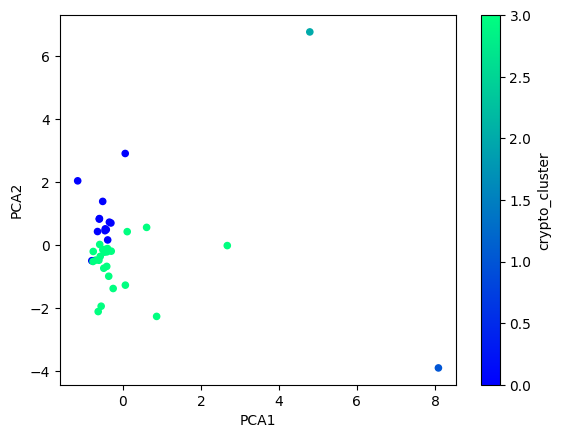

In [98]:
# Plot the clusters
pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster",
    colormap='winter')

<Axes: xlabel='PCA1', ylabel='PCA2'>

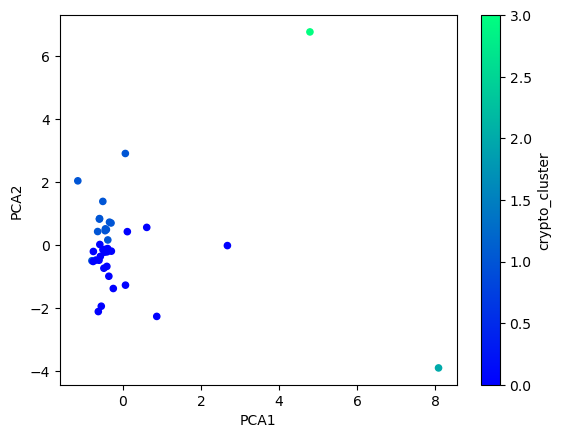

In [ ]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.


In [99]:
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

### Determine the Weights of Each Feature on each Principal Component

In [100]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2','PCA3'], index=df_scaled.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


In [102]:
components = ['PCA1', 'PCA2','PCA3']
for component in components:
    max_feature = pca_component_weights[component].idxmax()
    min_feature = pca_component_weights[component].idxmin()

    print(f"{component}:")
    print(f"- Strongest positive influence: {max_feature} ({pca_component_weights.loc[max_feature, component]})")
    print(f"- Strongest negative influence: {min_feature} ({pca_component_weights.loc[min_feature, component]})")
    print()

PCA1:
- Strongest positive influence: price_change_percentage_200d (0.5944679804758315)
- Strongest negative influence: price_change_percentage_24h (-0.4167277715597404)

PCA2:
- Strongest positive influence: price_change_percentage_30d (0.5621822775288049)
- Strongest negative influence: price_change_percentage_1y (-0.1507894064557609)

PCA3:
- Strongest positive influence: price_change_percentage_7d (0.7876703041045972)
- Strongest negative influence: price_change_percentage_60d (-0.3613770722056302)



#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**

PCA1:
- Strongest positive influence: price_change_percentage_200d (0.5944679804758315)
- Strongest negative influence: price_change_percentage_24h (-0.4167277715597404)

PCA2:
- Strongest positive influence: price_change_percentage_30d (0.5621822775288049)
- Strongest negative influence: price_change_percentage_1y (-0.1507894064557609)

PCA3:
- Strongest positive influence: price_change_percentage_7d (0.7876703041045972)
- Strongest negative influence: price_change_percentage_60d (-0.3613770722056302)